# **Import Necessary Library**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


# **Import and Read the Dataset**

In [21]:
df=pd.read_csv("/content/table1_suicidal_thoughts_and_behavior.csv")

In [3]:
df.head()

,Metropolitan Area,Serious thoughts of suicide: Percent (CI),Made any suicide plans: Percent (CI),Attempted Suicide: Percent (CI)
0,Total U.S.,4.0 (3.8-4.1),1.1 (1.1-1.2),0.5 (0.5-0.6)
1,"Albuquerque, NM",4.2 (3.0-5.8),1.1 (0.6-2.1),0.2 (0.1-0.5)*
2,"Atlanta-Sandy Springs-Marietta, GA",3.4 (2.4-4.8),0.4 (0.2-0.7)*,0.3 (0.1-0.7)
3,"Baltimore-Towson, MD",3.9 (2.7-5.6),1.0 (0.5-1.7),0.5 (0.2-1.1)
4,"Boston-Cambridge-Quincy, MA-NH",4.4 (3.3-5.8),1.0 (0.7-1.6),0.5 (0.3-1.0)


# **Check the Null Value**

In [4]:
# Check for null values in the entire DataFrame
null_values = df.isnull().sum()

# Display the count of null values for each column
print("Null values in each column:")
print(null_values)


Null values in each column:
Metropolitan Area                            0
Serious thoughts of suicide: Percent (CI)    0
Made any suicide plans: Percent (CI)         0
Attempted Suicide: Percent (CI)              0
dtype: int64


# **Check the Data Types**

In [5]:
# Check data types of each column
data_types = df.dtypes
# Display the data types
print("Data types of each column:")
print(data_types)

Data types of each column:
Metropolitan Area                            object
Serious thoughts of suicide: Percent (CI)    object
Made any suicide plans: Percent (CI)         object
Attempted Suicide: Percent (CI)              object
dtype: object


In [23]:
# Function to extract numeric values from a string
def extract_numeric(value):
    try:
        return float(value)
    except ValueError:
        # Handle special cases like '*'
        return float(value.split()[0])

# Apply the function to percentage columns
percentage_columns = ['Serious thoughts of suicide: Percent (CI)', 'Made any suicide plans: Percent (CI)', 'Attempted Suicide: Percent (CI)']

for column in percentage_columns:
    df[column] = df[column].apply(extract_numeric)


# **Explanatory Data Analysis**

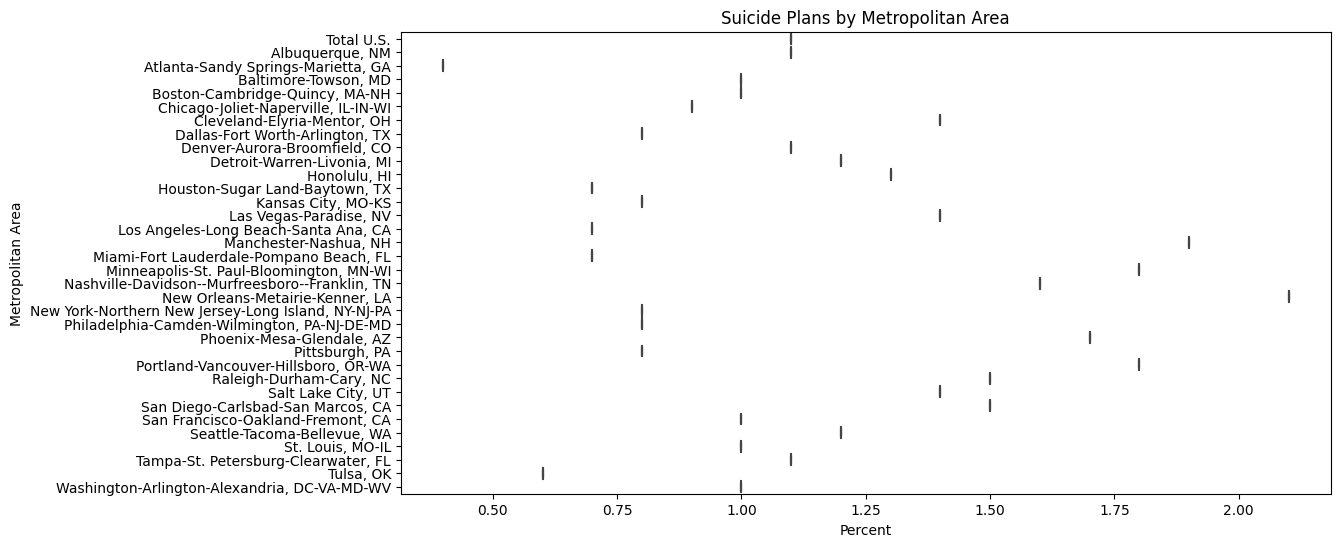

In [25]:
# Visualization 2: Boxplot of Suicide Plans by Metropolitan Area
plt.figure(figsize=(12, 6))
sns.boxplot(x='Made any suicide plans: Percent (CI)', y='Metropolitan Area', data=df, orient='h')
plt.title('Suicide Plans by Metropolitan Area')
plt.xlabel('Percent')
plt.show()

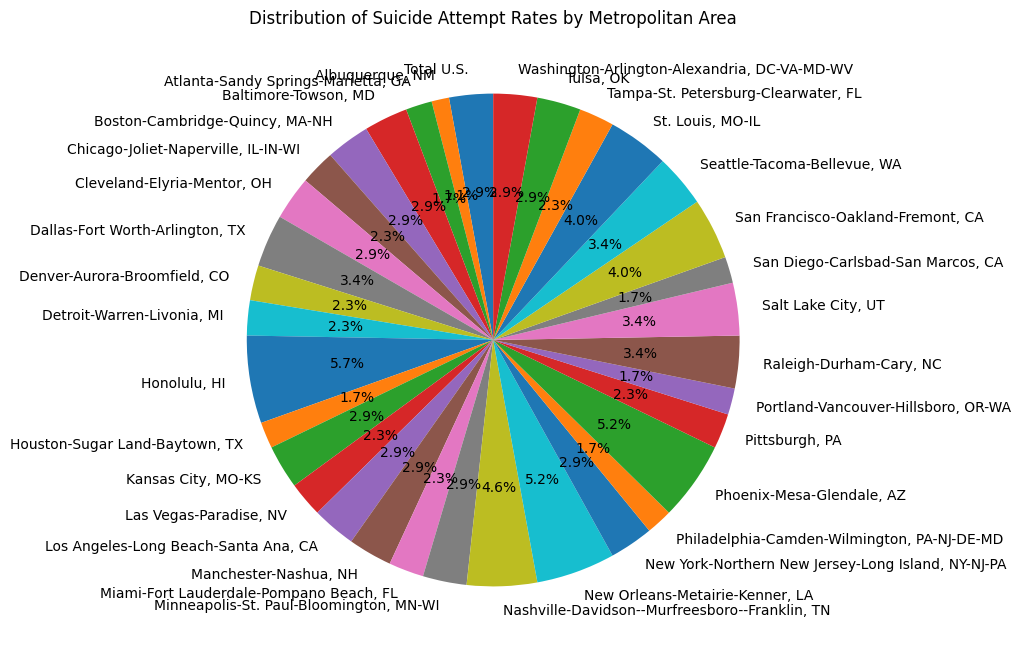

In [26]:
# Visualization 3: Pie Chart of Suicide Attempt Rates
plt.figure(figsize=(8, 8))
plt.pie(df['Attempted Suicide: Percent (CI)'], labels=df['Metropolitan Area'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Suicide Attempt Rates by Metropolitan Area')
plt.show()


<ipython-input-27-b55f058bddb8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


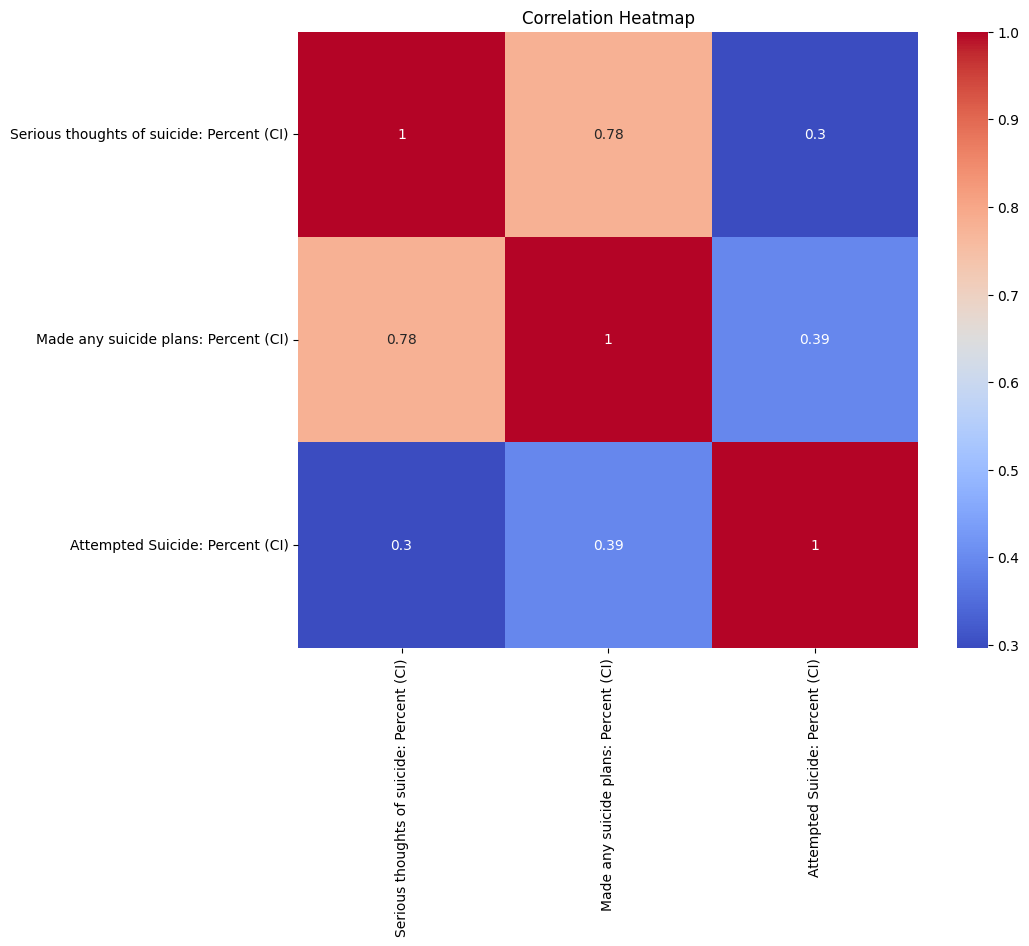

In [27]:
# Visualization 4: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

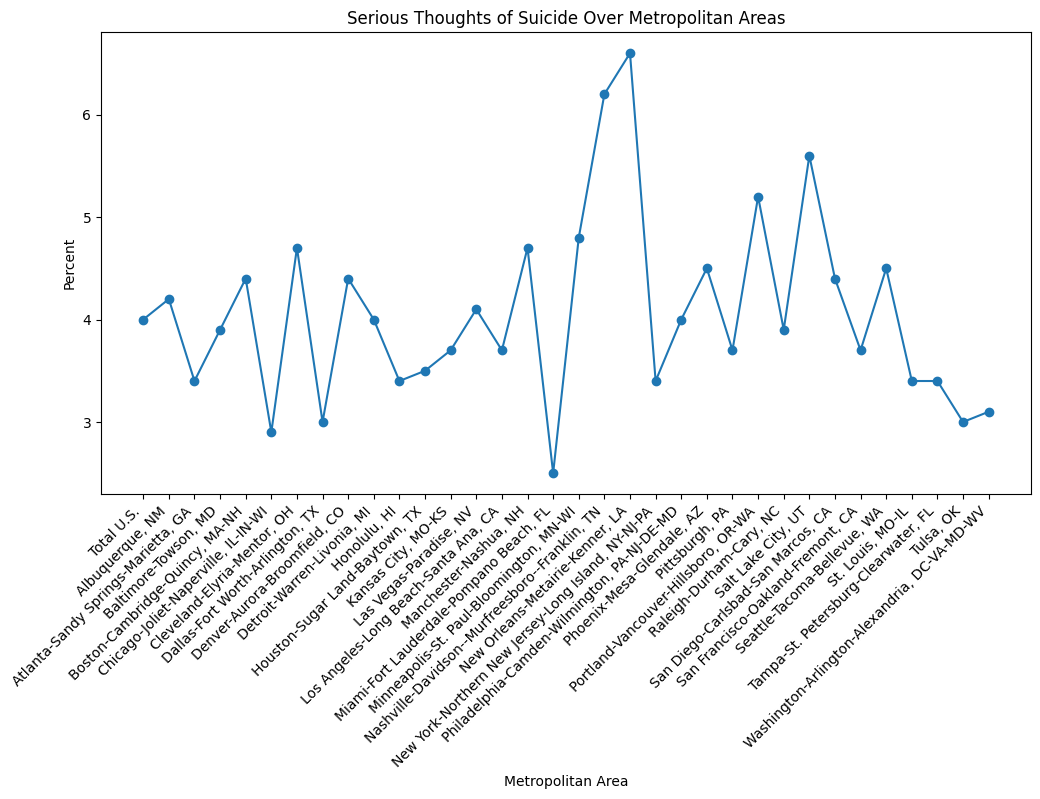

In [28]:
# Visualization 5: Line Plot of Suicidal Thoughts Over Metropolitan Areas
plt.figure(figsize=(12, 6))
plt.plot(df['Metropolitan Area'], df['Serious thoughts of suicide: Percent (CI)'], marker='o')
plt.title('Serious Thoughts of Suicide Over Metropolitan Areas')
plt.xlabel('Metropolitan Area')
plt.ylabel('Percent')
plt.xticks(rotation=45, ha='right')
plt.show()

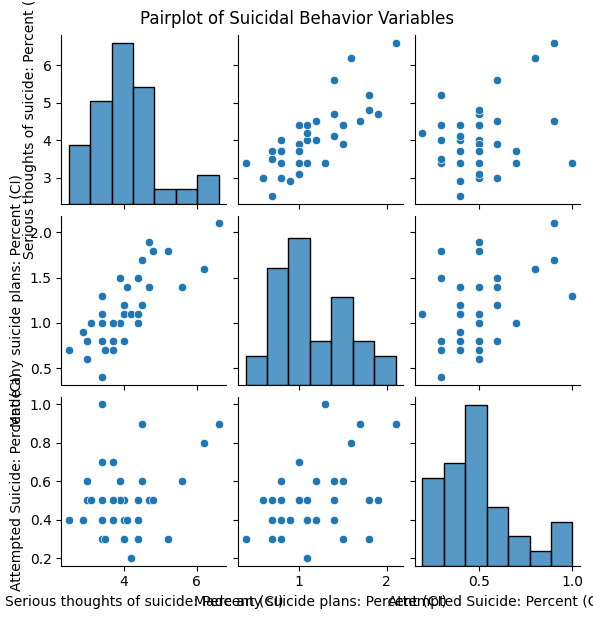

In [30]:
# Pairplot of All Variables
# Create a pairplot for all variables
sns.pairplot(df, height=2)
plt.suptitle('Pairplot of Suicidal Behavior Variables', y=1.02)
plt.show()


# **Set the Target Variable and Splitting the Dataset**

In [32]:
# Let's create a binary variable indicating high or low rates
df['HighSeriousThoughts'] = np.where(df['Serious thoughts of suicide: Percent (CI)'] > 4.0, 1, 0)

# Features and target variable
X = df[['Made any suicide plans: Percent (CI)', 'Attempted Suicide: Percent (CI)']]
y = df['HighSeriousThoughts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#**Build Logistic Regression**

In [34]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)


# **Random Forest Classifier**

In [35]:
# Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
rf_predictions = random_forest_model.predict(X_test_scaled)

# **Evaluation Score for Both Of the Model**

In [36]:
# Evaluation Metrics
def evaluate_model(model, predictions, y_true):
    accuracy = accuracy_score(y_true, predictions)
    classification_report_str = classification_report(y_true, predictions)
    confusion_mat = confusion_matrix(y_true, predictions)

    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report_str)
    print("\nConfusion Matrix:")
    print(confusion_mat)

In [37]:
# Evaluate Logistic Regression model
evaluate_model(logistic_model, logistic_predictions, y_test)

# Evaluate Random Forest model
evaluate_model(random_forest_model, rf_predictions, y_test)

Model: LogisticRegression
Accuracy: 0.8571

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.83      0.91         6

    accuracy                           0.86         7
   macro avg       0.75      0.92      0.79         7
weighted avg       0.93      0.86      0.87         7


Confusion Matrix:
[[1 0]
 [1 5]]
Model: RandomForestClassifier
Accuracy: 0.8571

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.83      0.91         6

    accuracy                           0.86         7
   macro avg       0.75      0.92      0.79         7
weighted avg       0.93      0.86      0.87         7


Confusion Matrix:
[[1 0]
 [1 5]]


# **ROC Curve for Both of the Model**

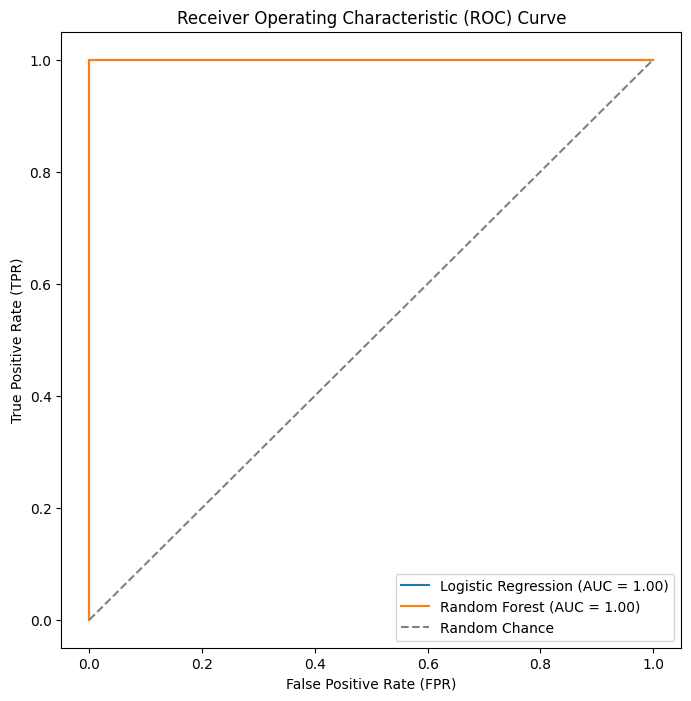

In [41]:
# Function to plot ROC curve
def plot_roc_curve(model, X, y_true, label):
    y_scores = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

# Plot ROC curves for both models
plt.figure(figsize=(8, 8))

# Logistic Regression
plot_roc_curve(logistic_model, X_test_scaled, y_test, 'Logistic Regression')

# Random Forest
plot_roc_curve(random_forest_model, X_test_scaled, y_test, 'Random Forest')

# Plotting the diagonal line representing random chance
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Chance')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()